### Part IV Overview:
Goal: Analyze the reviews from the Yelp API and find the common words that are used in the review

### Steps:
* Create functions to do natural language processing and create graphs
* Analyze each tables in the acoommondation database

In [5]:
import nltk
import string
import random
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import sqlite3 as sql

### Natural Language Processing

In [6]:
def nlp_test(text):
    """
    use natural language processing to remove and lemmatize text
    
    Argument: text
    
    Return: stemed text
    """
    
    stop_words = set(stopwords.words("english"))
    common = ["said", "also", "one", "would", "like", "new", "many", "make", "really", "think"]
    common_words = [x.decode('UTF8') for x in common]
    words = nltk.word_tokenize(text)
    # remove stop words and common words
    words = [wor.lower() for wor in words]
    filtered = [wor for wor in words if not wor in stop_words]
    filtered = [wor for wor in filtered if not wor in common_words]
    # word lemmatization for English words only
    lmtzr = WordNetLemmatizer()
    lem = [lmtzr.lemmatize(fil) for fil in filtered if fil.isalpha()]
    return lem

In [7]:
def graph_wordCloud(text):
    """
    create wordclound to display the popular terms from the text
    
    Argument: text
    
    Return: wordcloud
    """
    wordcloud = WordCloud(background_color='white', width=1200, height=1000, max_words=40).generate(text)
    return plt.imshow(wordcloud)

In [8]:
def review_graph(dataframe):
    """
    create a wordcloud to display the popular terms
    
    Argument: dataframe 
    
    Return: fd.plot and wordcloud
    
    """
    # apply natural language processing to each row of the article dataframe
    manipulate_text = dataframe.apply(lambda row: nlp_test(row["snippet_text"]), axis=1)
    all_words = [w for w in manipulate_text]
    merged_all_words = list(itertools.chain.from_iterable(all_words))
    # Text Classification
    fd = nltk.FreqDist(merged_all_words)
    # Graph the text distribution
    fd.plot(40,cumulative=False)
    text_final = ' '.join(merged_all_words)
    graph_wordCloud(text_final)


In [9]:
def review_df(dataframe):
    """
    create dataframe for the most popular reviews
    
    Argument: dataframe
    
    Return: dataframe with the term and review counts
    """
    # apply natural language processing to each row of the dataframe
    manipulate_text = dataframe.apply(lambda row: nlp_test(row["snippet_text"]), axis=1)
    all_words = [w for w in manipulate_text]
    merged_all_words = list(itertools.chain.from_iterable(all_words))
    # Text Classification
    fd = nltk.FreqDist(merged_all_words)
    output = fd.most_common(25)
    pd_review = pd.DataFrame(output)
    pd_review.rename(columns = {list(pd_review)[0]: 'Reviews', list(pd_review)[1]: 'Counts'}, inplace = True)
    return pd_review

In [10]:
def bargraph(df_review):
    """
    create bargraphs to display the most popular reviews
    
    Argument: dataframe created from the review_df
    
    Return: a bar graph 
    """
    ax = df_review.plot.bar(x='Reviews', rot=0, title='Most Popular Reviews', figsize=(15,10), fontsize=9)
    ax.set_ylabel("Counts")
    ax.set_xlabel("Reviews")
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, loc='best')

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [11]:
def getinfo(keyterm):
    """
    create graphs using the data from the database created in Part I
    
    Argument: keyterm(restaurants/hotels/nightlife/landmarks), criteria
    
    Return: fd.plot, wordcloud and bargraph
    """
    conn = sql.connect("accommodation.sqlite")
    df_key = pd.read_sql("SELECT snippet_text FROM Best_" + keyterm, conn)
    review_graph(df_key)
    df_review_dis_res = review_df(df_key)
    bargraph(df_review_dis_res)
    conn.close()


### Review Analysis For Best Rated Nearby Restaurants, Hotels, Landmarks for all the cities in California

In [12]:
travel_item = ["Restaurants", "Hotels", "Landmarks"]

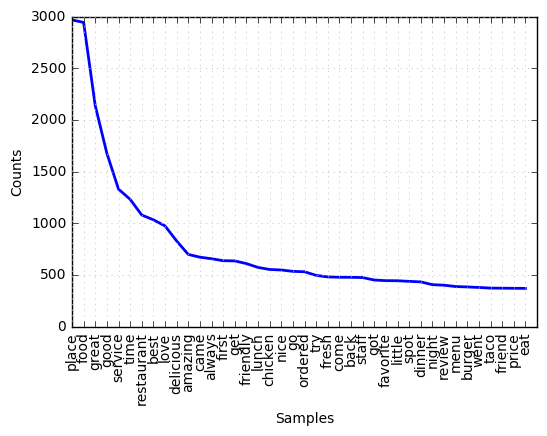

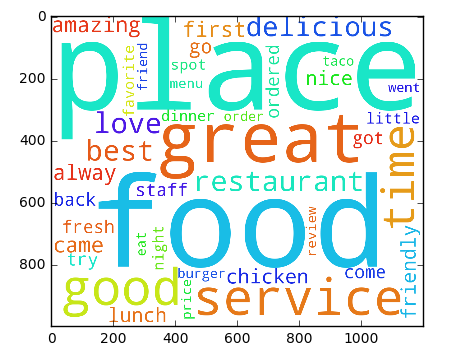

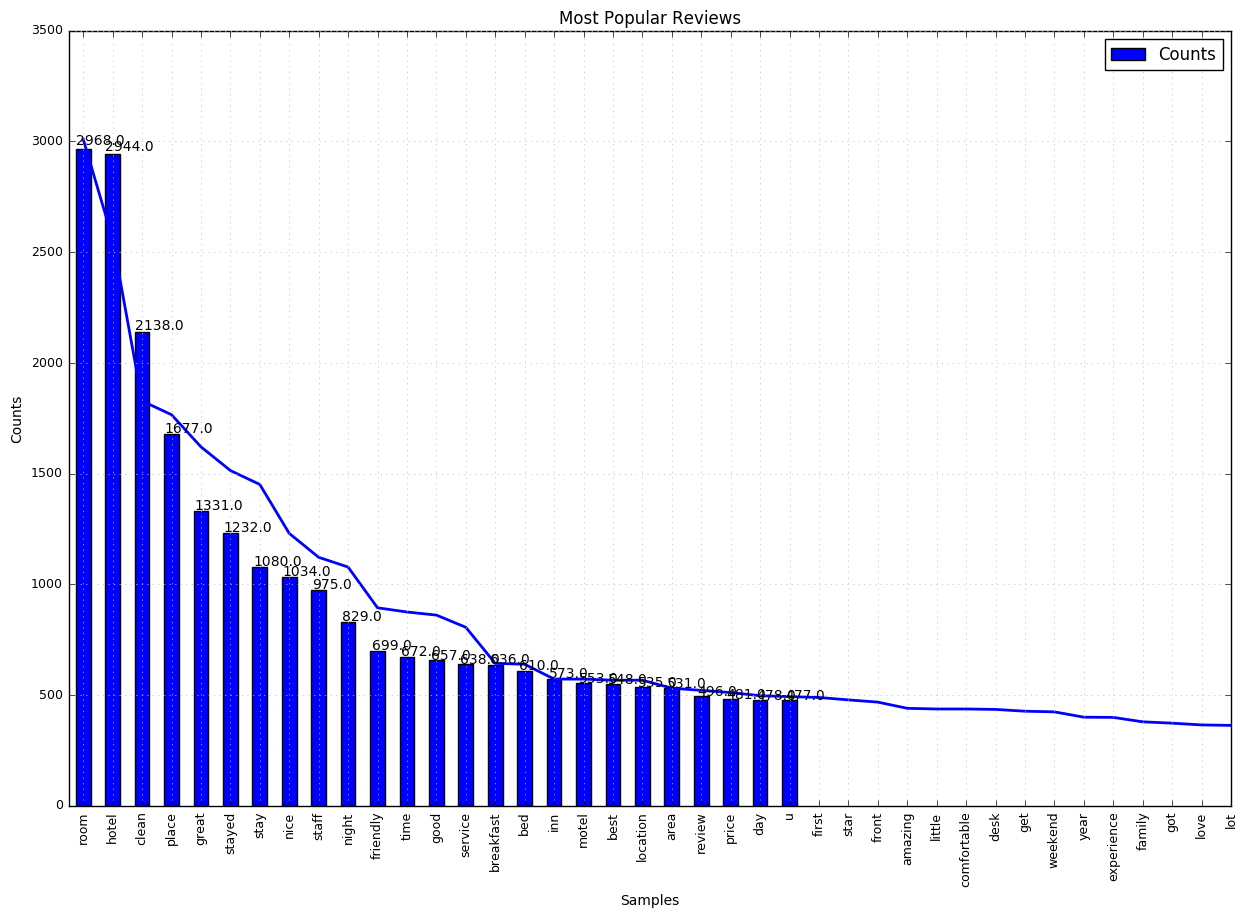

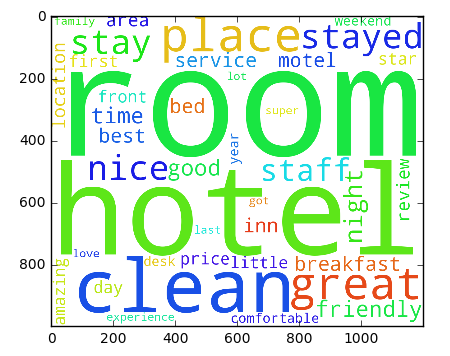

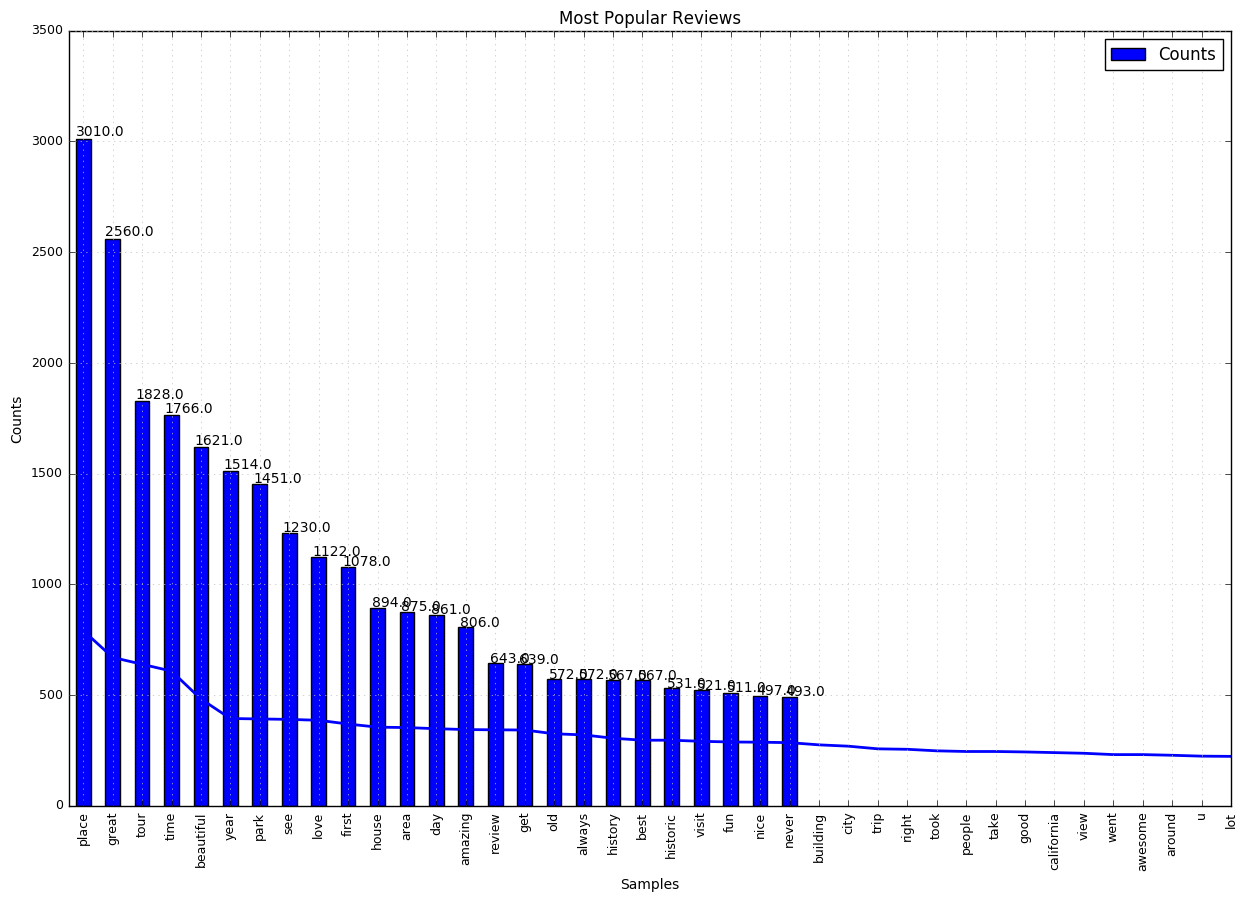

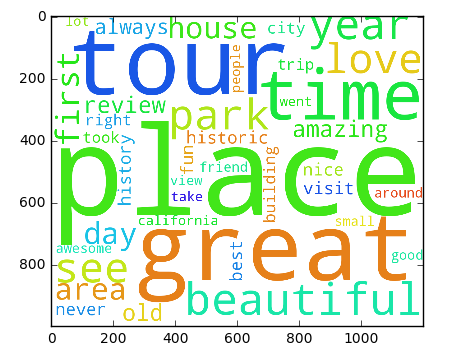

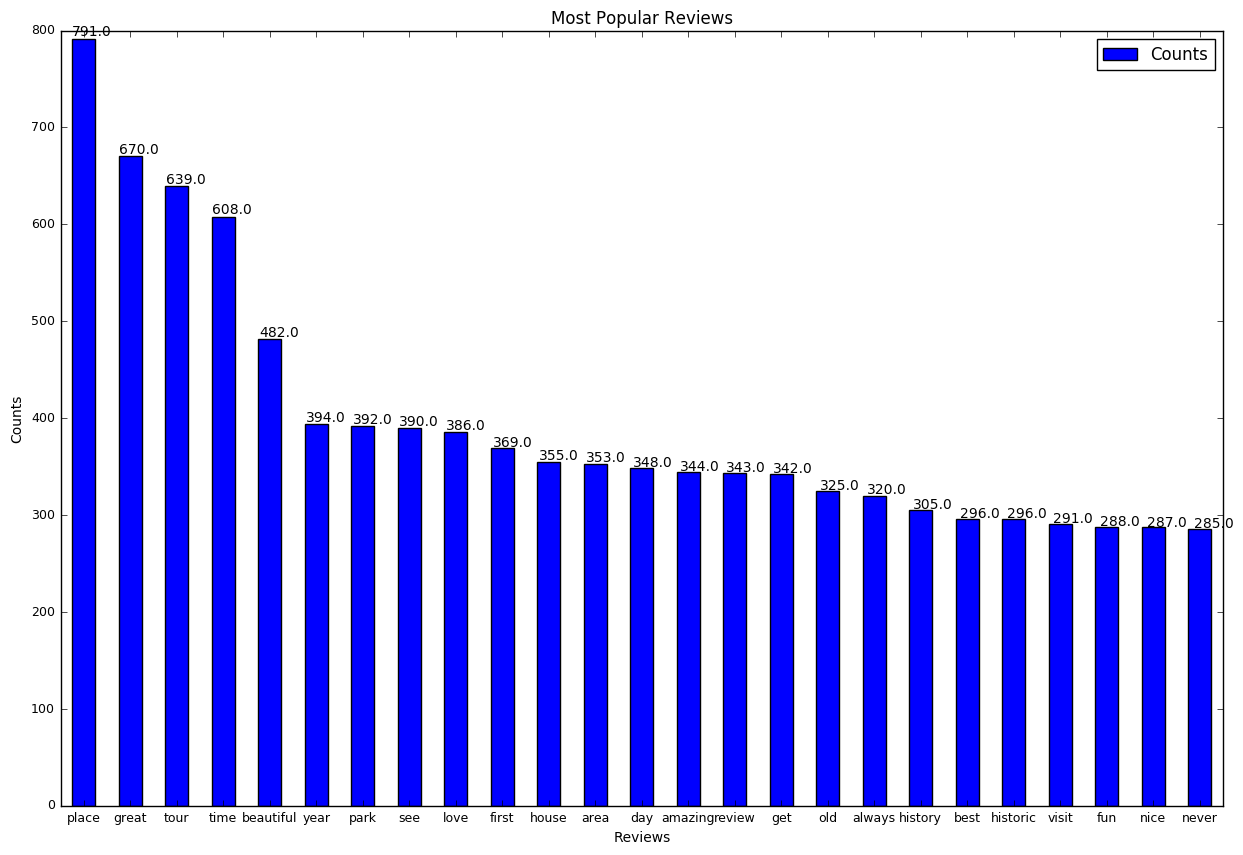

In [13]:
for item in travel_item:
    getinfo(item)

### Restaurants Analysis
* The restaurants with higher rating tend to have great food quality, friendly customer service and good time management
* Chicken seems to be popular in the high rated restaurants

### Hotels Analysis
* The hotels with higher rating tend to provide clean environment, great and friendly customer service
* The customers also discuss the breakfast quality more often than other meals

### Landmark Analysis
* The landmarks with higher rating tend to have great and beautiful environment and amazing view
* Some examples of landmarks are park or historic landmarks